# Minimal example of esn library use

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from echo import esn

17.15250190288153


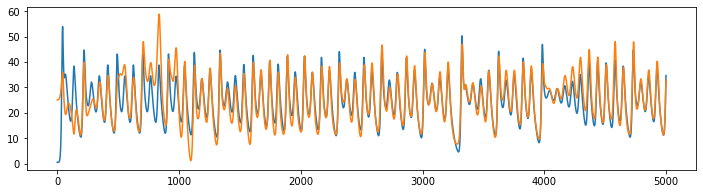

In [2]:
Data = esn.Data
Reservoir = esn.Reservoir

data = Data.create_source('lorenz')
x,y = data.generate(50000, seed=1)
model = Reservoir(200)
model.fit(x, y, skip=200)

x,y = data.generate(5000, seed=0.5)
z = model.predict(x)
loss = esn.utils.loss(y[200:], z[200:])
print(loss)

plt.figure(figsize=(12,3));
plt.plot(y);
plt.plot(z);